In [18]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import svm


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import MinMaxScaler,robust_scale,LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import  StandardScaler


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier




In [19]:
df=pd.read_csv('zomato.csv')

In [20]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [21]:
df.drop(columns=['dish_liked','url','address','menu_item','phone'],inplace=True) 

<Axes: ylabel='votes'>

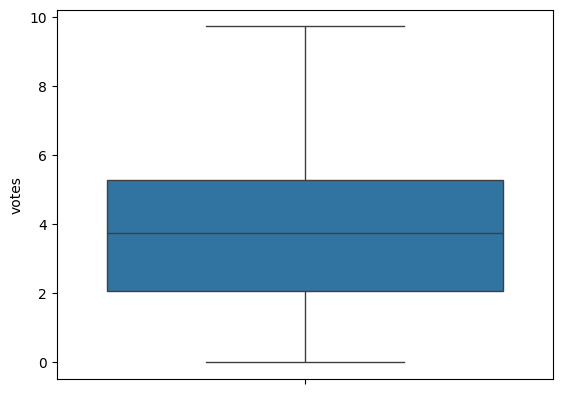

In [22]:
df['votes']=np.log1p(df['votes'])
df['votes'].value_counts().sum()

sns.boxplot(df['votes'])

In [23]:
ColumnsToFill=['rate' , 'approx_cost(for two people)', 'rest_type', 'cuisines', 'location']

for i in ColumnsToFill :
    df[i]=df[i].fillna(df[i].mode()[0])
    #print(df[i].mode())

df[ColumnsToFill].isna().sum()

rate                           0
approx_cost(for two people)    0
rest_type                      0
cuisines                       0
location                       0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         51717 non-null  object 
 4   votes                        51717 non-null  float64
 5   location                     51717 non-null  object 
 6   rest_type                    51717 non-null  object 
 7   cuisines                     51717 non-null  object 
 8   approx_cost(for two people)  51717 non-null  object 
 9   reviews_list                 51717 non-null  object 
 10  listed_in(type)              51717 non-null  object 
 11  listed_in(city)              51717 non-null  object 
dtypes: float64(1), object(11)
memory usage: 4.7+ MB


In [25]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,6.654153,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,6.669498,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,6.823286,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,4.488636,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,5.117994,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [26]:

df['approx_cost(for two people)'] = (
    df['approx_cost(for two people)']
    .astype(str)
    .str.replace(',', '')                                 # Remove commas
)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')


df['rate'] = df['rate'].replace('NEW', np.nan)      
df['rate'] = df['rate'].replace('-', np.nan)         
df['rate'] = df['rate'].str.strip()                  

df['rate'] = df['rate'].str.split('/').str[0]


df['rate'] = df['rate'].astype(float)


def categorize_rate(rate):
    if rate < 2:
        return "Very Bad"
    elif rate < 3:
        return "Bad"
    elif rate < 3.5:
        return "Medium"
    elif rate < 4:
        return "Good"
    else:
        return "Very Good"

df["rate_category"] = df["rate"].apply(categorize_rate)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["rate_category_encoded"] = encoder.fit_transform(df["rate_category"])
df.drop(columns=['rate','rate_category'],inplace=True)
num_classes = len(encoder.classes_)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   votes                        51717 non-null  float64
 4   location                     51717 non-null  object 
 5   rest_type                    51717 non-null  object 
 6   cuisines                     51717 non-null  object 
 7   approx_cost(for two people)  51717 non-null  int64  
 8   reviews_list                 51717 non-null  object 
 9   listed_in(type)              51717 non-null  object 
 10  listed_in(city)              51717 non-null  object 
 11  rate_category_encoded        51717 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 4.5+ MB


In [28]:
toNum=[]

for column in df.columns:
    if df[column].dtype=='object':
        toNum.append(column)
toNum    

['name',
 'online_order',
 'book_table',
 'location',
 'rest_type',
 'cuisines',
 'reviews_list',
 'listed_in(type)',
 'listed_in(city)']

In [29]:
le=LabelEncoder()

for column in toNum:
    df[column]=le.fit_transform(df[column])
df.head()    


,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),rate_category_encoded
0,3690,1,1,6.654153,1,27,2159,800,10851,0,1,4
1,7022,1,0,6.669498,1,27,952,800,12530,0,1,4
2,6499,1,0,6.823286,1,22,766,800,4652,0,1,1
3,199,0,0,4.488636,1,78,2555,300,9293,0,1,1
4,2940,0,0,5.117994,4,27,2188,600,15505,0,1,1


In [30]:
for column in toNum:
    df[column]=df[column].astype('int64')
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  int64  
 1   online_order                 51717 non-null  int64  
 2   book_table                   51717 non-null  int64  
 3   votes                        51717 non-null  float64
 4   location                     51717 non-null  int64  
 5   rest_type                    51717 non-null  int64  
 6   cuisines                     51717 non-null  int64  
 7   approx_cost(for two people)  51717 non-null  int64  
 8   reviews_list                 51717 non-null  int64  
 9   listed_in(type)              51717 non-null  int64  
 10  listed_in(city)              51717 non-null  int64  
 11  rate_category_encoded        51717 non-null  int32  
dtypes: float64(1), int32(1), int64(10)
memory usage: 4.5 MB



Logistic Regression
Accuracy: 0.5329
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.00      0.01       467
           1       0.48      0.59      0.53      3571
           2       0.48      0.25      0.33      1780
           4       0.59      0.65      0.62      4526

    accuracy                           0.53     10344
   macro avg       0.46      0.37      0.37     10344
weighted avg       0.52      0.53      0.51     10344

Confusion Matrix:
[[   2  352   65   48]
 [   5 2096  143 1327]
 [   0  616  453  711]
 [   0 1287  278 2961]]

Random Forest
Accuracy: 0.9694
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       467
           1       0.95      0.98      0.96      3571
           2       0.96      0.94      0.95      1780
           4       0.99      0.98      0.99      4526

    accuracy                           0.97     10344
   macro avg

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:05:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost
Accuracy: 0.9139
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.65      0.76       467
           1       0.85      0.94      0.89      3571
           2       0.92      0.82      0.87      1780
           4       0.97      0.96      0.96      4526

    accuracy                           0.91     10344
   macro avg       0.91      0.84      0.87     10344
weighted avg       0.92      0.91      0.91     10344

Confusion Matrix:
[[ 304  119   37    7]
 [  17 3357   91  106]
 [  10  297 1460   13]
 [   0  188    6 4332]]

SVM
Accuracy: 0.7458
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.01      0.02       467
           1       0.61      0.81      0.70      3571
           2       0.76      0.58      0.66      1780
           4       0.88      0.84      0.86      4526

    accuracy                           0.75     10344
   macro avg       0.71      0.56 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4104\605614719.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='rocket')


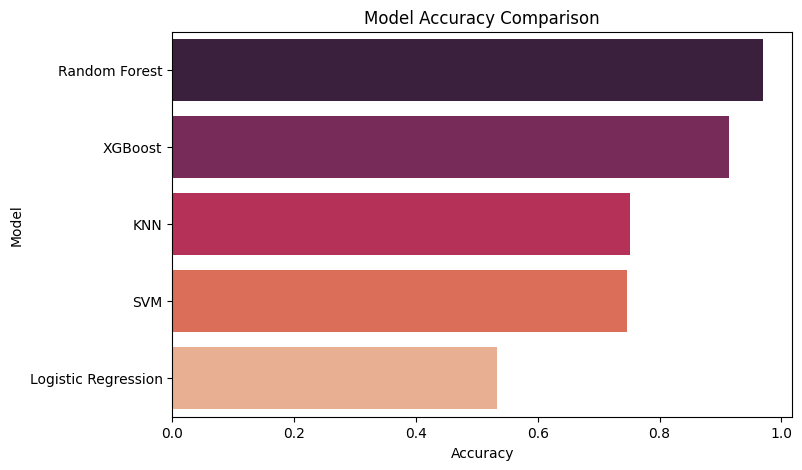

In [31]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib
from sklearn.impute import SimpleImputer






target_col = "rate_category_encoded"  
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode target if it's categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Handle categorical features (simple encoding)
X = pd.get_dummies(X, drop_first=True)

# Standardize numeric features



imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
# =========================================
# Define models
# =========================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": svm.SVC(),
    "KNN": KNeighborsClassifier()
}





results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    # Save
    joblib.dump(model, f"{name}.pkl")

# =========================================
# Compare Results
# =========================================
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='rocket')
plt.title("Model Accuracy Comparison")
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.regularizers import l2

# Example input shape (e.g., 20 features)
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)


input_dim = X_train.shape[1]  # automatically 13 in your case
num_classes = y_train_cat.shape[1]  # number of categories after one-hot encoding


model = Sequential([
    Dense(64, activation='relu',  input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu', ),
    Dense(8, activation='relu', ),
    Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()



C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 5)              │            45 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,157 (12.33 KB)

 Trainable params: 3,157 (12.33 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
from tensorflow.keras.utils import to_categorical

# Suppose you have 5 categories
num_classes = 5
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

model.fit(X_train, y_train_cat, epochs=5, validation_data=(X_test, y_test_cat))


Epoch 1/5
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 2s 974us/step - accuracy: 0.5131 - loss: 1.1350 - val_accuracy: 0.7263 - val_loss: 0.6835
Epoch 2/5
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - accuracy: 0.7241 - loss: 0.6772 - val_accuracy: 0.7232 - val_loss: 0.6710
Epoch 3/5
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - accuracy: 0.7337 - loss: 0.6499 - val_accuracy: 0.7431 - val_loss: 0.6339
Epoch 4/5
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - accuracy: 0.7393 - loss: 0.6391 - val_accuracy: 0.7398 - val_loss: 0.6345
Epoch 5/5
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.7392 - loss: 0.6360 - val_accuracy: 0.7431 - val_loss: 0.6243
